## 5.2 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
5장에서 사용할 데이터인 쿼라 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  

In [1]:
import zipfile

In [7]:
DATA_IN_PATH = './data_in/'

In [8]:
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head(6)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1


In [13]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB


In [14]:
print(f'전체 학습 데이터의 개수: {len(train_data)}')

전체 학습 데이터의 개수: 404290


In [26]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head(8)

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
5    Astrology: I am a Capricorn Sun Cap moon and c...
6                                  Should I buy tiago?
7                       How can I be a good geologist?
dtype: object

In [42]:
print(f'교육 데이터의 총 질문 수: {len(np.unique(train_set))}')
print(f'반복해서 나타나는 질문의 수: {np.sum(train_set.value_counts() > 1)}')

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

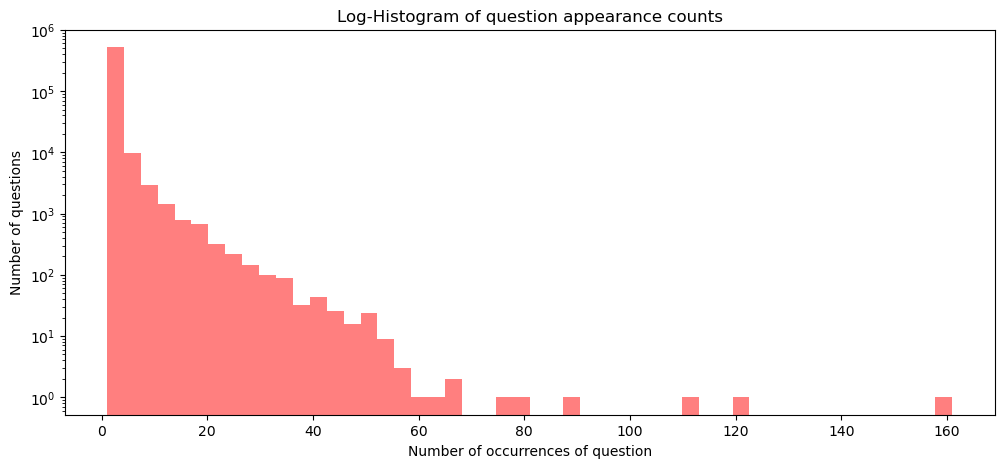

In [43]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [44]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x30fc60510>,
 'caps': [<matplotlib.lines.Line2D at 0x30fc616d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30fa9bd10>],
 'medians': [<matplotlib.lines.Line2D at 0x30fc62910>],
 'fliers': [<matplotlib.lines.Line2D at 0x30fc63ad0>],
 'means': [<matplotlib.lines.Line2D at 0x30fc63210>]}

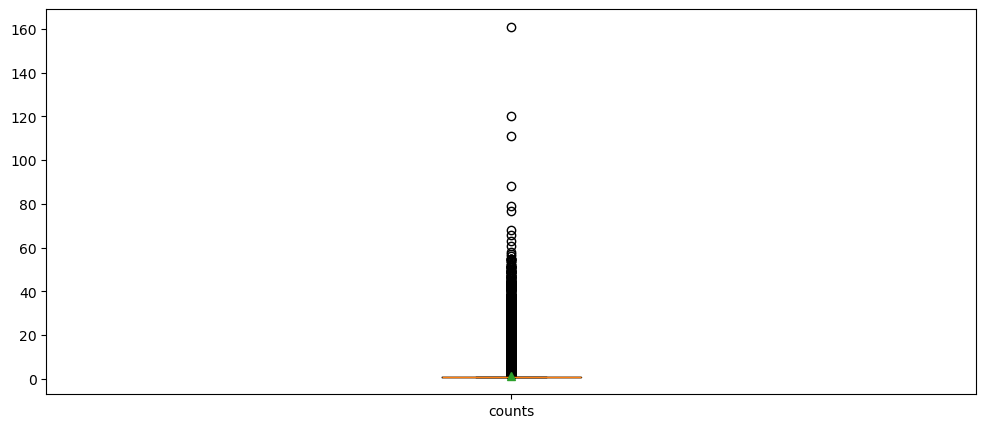

In [45]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

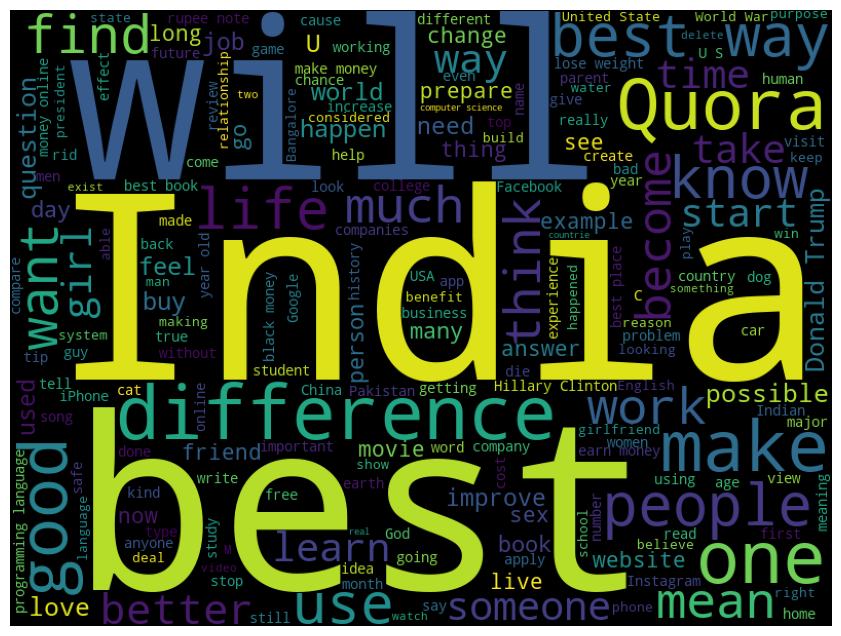

In [46]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(12, 8))
plt.imshow(cloud)
plt.axis('off')

<Axes: xlabel='is_duplicate', ylabel='count'>

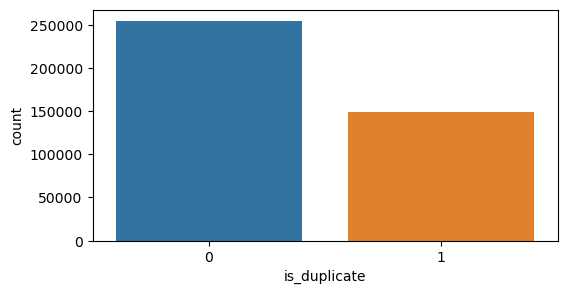

In [48]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x='is_duplicate', data=  train_data, ax=axe)

In [50]:
train_length = train_set.apply(len)
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0, 0.5, 'Probability')

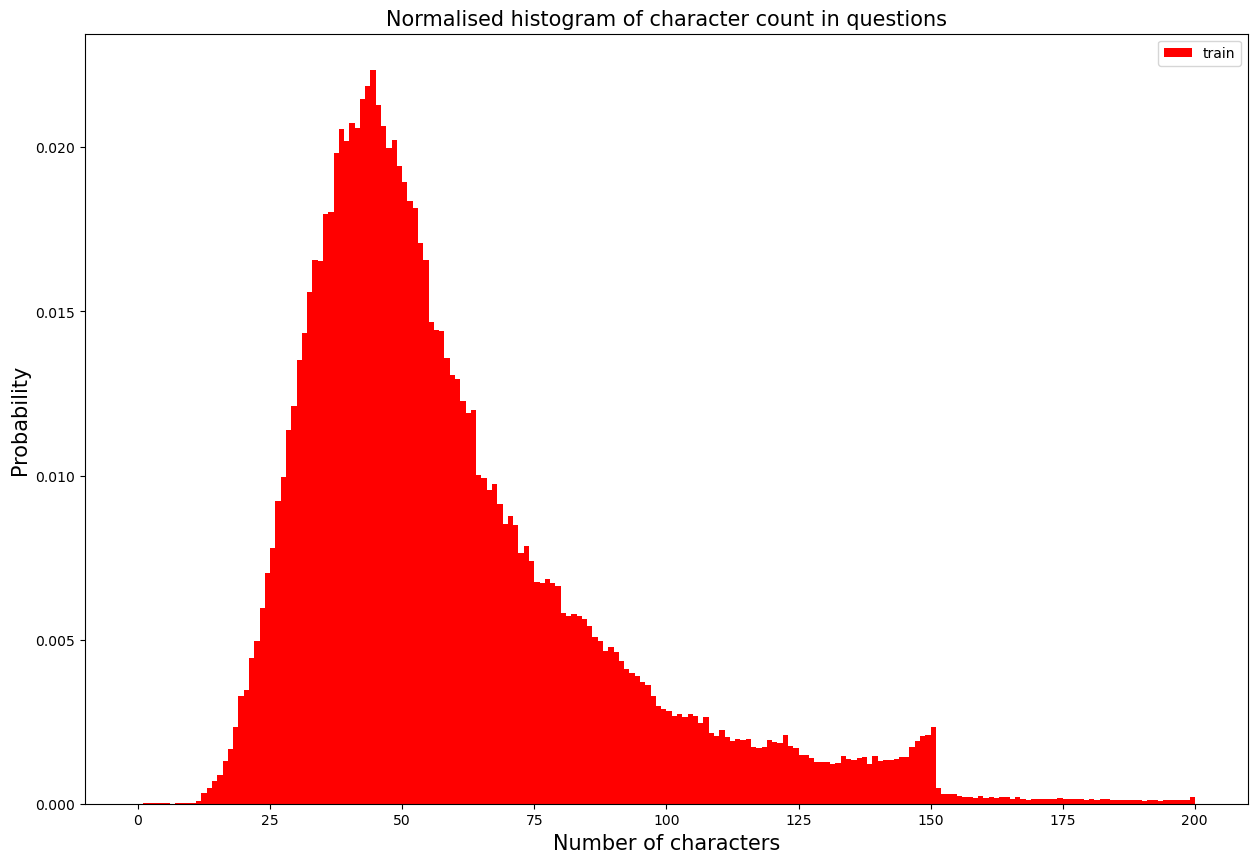

In [64]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r',density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [53]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x306777750>,
 'caps': [<matplotlib.lines.Line2D at 0x306784b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x30673fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x306785b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x306784910>],
 'means': [<matplotlib.lines.Line2D at 0x306786390>]}

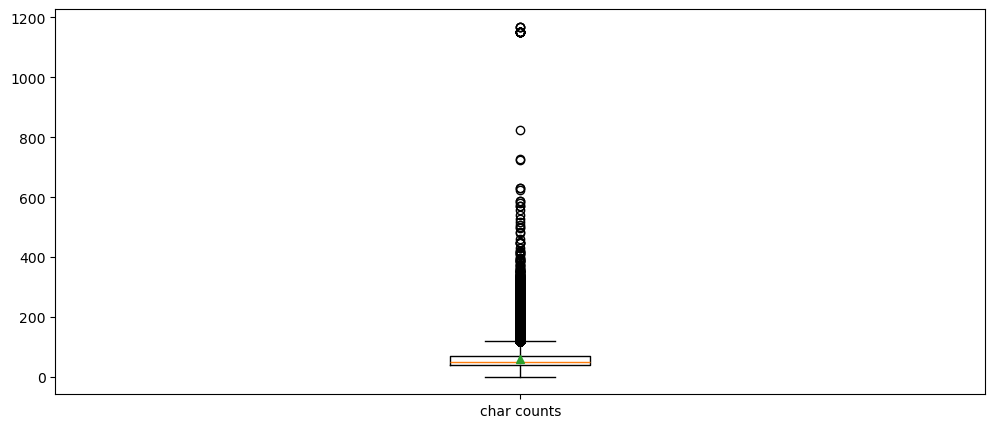

In [54]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [56]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))
train_word_counts

0         14
1          8
2         14
3         11
4         13
          ..
808575    13
808576     9
808577     3
808578    25
808579    10
Length: 808580, dtype: int64

Text(0, 0.5, 'Prabability')

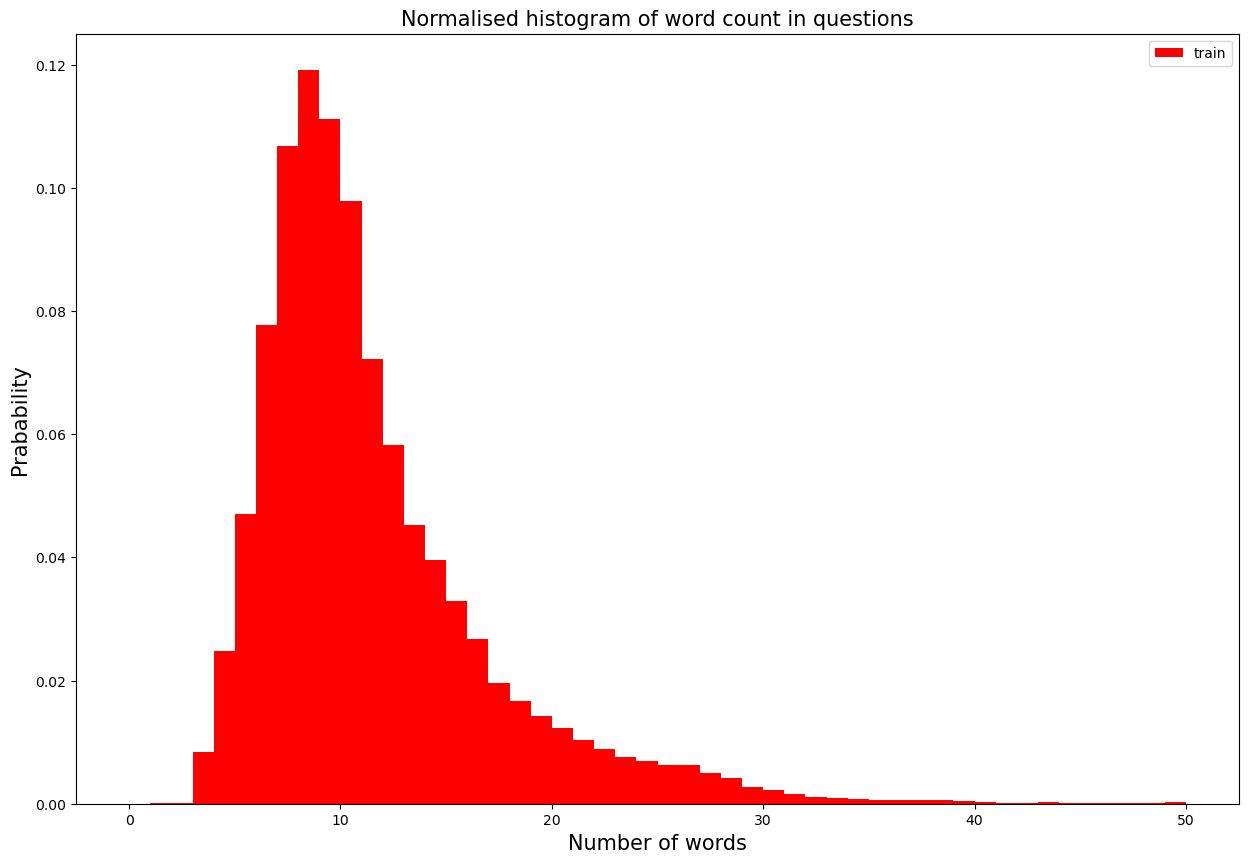

In [63]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r',density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [65]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x31d526050>,
 'caps': [<matplotlib.lines.Line2D at 0x31d526290>,
 'boxes': [<matplotlib.lines.Line2D at 0x31d526c10>],
 'medians': [<matplotlib.lines.Line2D at 0x31d526b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x31d21fbd0>],
 'means': [<matplotlib.lines.Line2D at 0x31d526f50>]}

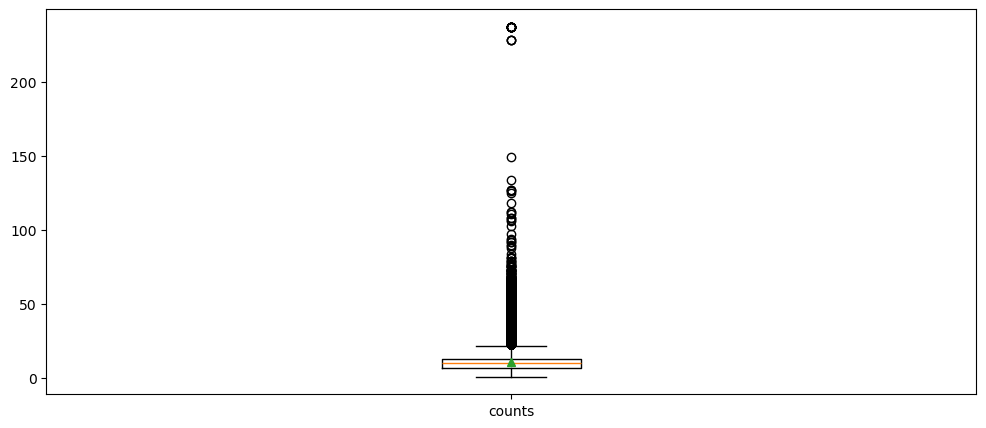

In [66]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [67]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


### 데이터 전처리

In [71]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
DATA_IN_PATH = './data_in/'
FILTERS = "[~.,!?\"':;)(]"
MAX_SEQUENCE_LENGTH = 31

In [73]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding = 'utf=8')
train_data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [74]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

# 언더 샘플링을 위한 작업
class_difference = len(train_neg_data) - len(train_pos_data)
print(class_difference)
sample_frac = 1- (class_difference / len(train_neg_data))
print(sample_frac)

train_neg_data = train_neg_data.sample(frac = sample_frac)

105764
0.5852831268846044


In [75]:
print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {}".format(len(train_neg_data)))

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [79]:
train_data = pd.concat([train_neg_data, train_pos_data])
train_data

,id,qid1,qid2,question1,question2,is_duplicate
136522,136522,217807,217808,Is btech necessary to get a job after learning...,Where should I apply for a job after learning ...,0
192981,192981,292766,292767,Why is the Ukrainian army having so much troub...,Why is there so much trouble in Arab countries?,0
112621,112621,184238,184239,How do INTPs have fun?,How can an INTP become more practical?,0
27708,27708,51448,51449,Which is the best data analytics company in In...,What are the top analytics startups from India?,0
131716,131716,211091,211092,Does the Universe work like a hard drive?,What did people know of static electricity in ...,0
...,...,...,...,...,...,...
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [82]:
# 정규 표현식 필터
FILTERS = "[~.,!?\"':;)(]"
change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

# 정규표현식으로 제거된 질문에 대하여 소문자로 리스트 저장
for q in questions1:
    filtered_questions1.append(re.sub(change_filter,"", q).lower())

for q in questions2:
    filtered_questions2.append(re.sub(change_filter,"", q).lower())

In [83]:
# 특수문자를 제거한 질문에 대하여 토큰화 진행
tokenizer = Tokenizer()
# 각 영단어에 대하여 토큰화 진행
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [88]:
# 각 질문 리스트에 대하여 단어 토큰화 된 숫자로 변환
questions1_sequnce = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequnce = tokenizer.texts_to_sequences(filtered_questions2)

questions1_sequnce[0]

[3, 638, 1003, 6, 27, 7, 110, 65, 192, 7808, 2540, 1461, 12, 6382]

In [90]:
# 단어의 길이를 맞추기 위해 pad_sequences를 사용하여 최대 길이를 맞춰줌
q1_data = pad_sequences(questions1_sequnce, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequnce, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [93]:
q1_data[0]

array([   3,  638, 1003,    6,   27,    7,  110,   65,  192, 7808, 2540,
       1461,   12, 6382,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [94]:
# 토큰화 진행된 단어 사전 생성
word_vocab = {}
word_vocab = tokenizer.word_index

labels = np.array(train_data['is_duplicate'], dtype = int)

print(f'Shape of question1 data: {q1_data.shape}')
print(f'Shape of question2 data: {q2_data.shape}')
print(f"Shape of label: {labels.shape}")
print(f"Words in index: {len(word_vocab)}")

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 76360


In [95]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [96]:
# 토큰화 진행시킨 질문들에 대하여 npy 파일로 변환하여 저장, label 도 저장 
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [97]:
# 테스트 데이터에 대하여 저장
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_19789/4138079868.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')


In [98]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [99]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [100]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [101]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)